# Import the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data collection and Analysis

In [3]:
# loading dataset from csv file to a pandas data frame.
df = pd.read_excel("C:/Users/rakes/Desktop/python/odin/ML1001/Health_insurance_cost.xlsx")

In [4]:
# first 5 rows of the dataframe
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
df.shape

(1338, 7)

In [6]:
# getting some information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Categorical Features:
- gender
- smoking_status
- location

In [7]:
#checking for missing values
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [8]:
df=df.dropna(subset='health_insurance_price')
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

In [9]:
df.shape

(1336, 7)

<AxesSubplot:xlabel='health_insurance_price', ylabel='Count'>

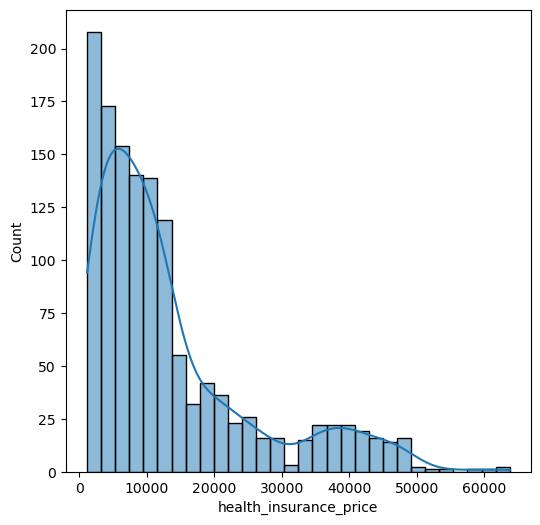

In [10]:
# Handling missing values
# Analyse the distribution of data in the missing value column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.health_insurance_price,kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

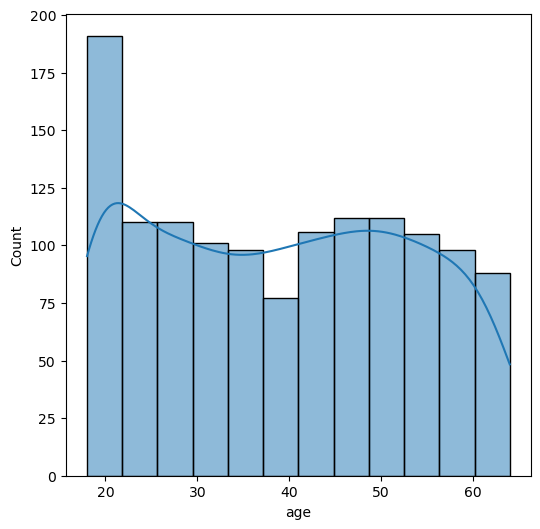

In [11]:
# Analyse the distribution of data in Age column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.age,kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

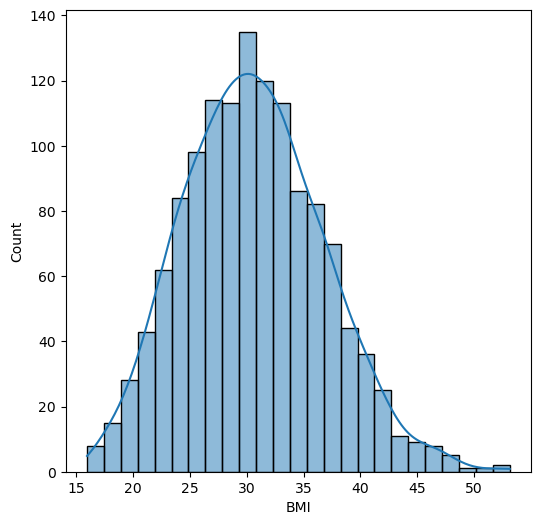

In [12]:
# Analyse the distribution of data in Age column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.BMI,kde=True)

- In this datframe of BMI and Age are Symmetrical and Uniform data presents so we can impute mean value for the miss data.
- But in Heath_Insurance_Price has Right Skewed data.

In [13]:
# Replace mean value with Missing value of Age and BMI columns.

df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)

In [14]:
# Checking missing values after imputation.

df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [15]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.631158,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520


# Data Analysis

In [16]:
# Data Analysis

df.describe()

,age,BMI,Children,health_insurance_price
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164373,30.631158,1.094311,13268.527719
std,13.915466,6.052198,1.206138,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4744.325050
50%,39.164373,30.495000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


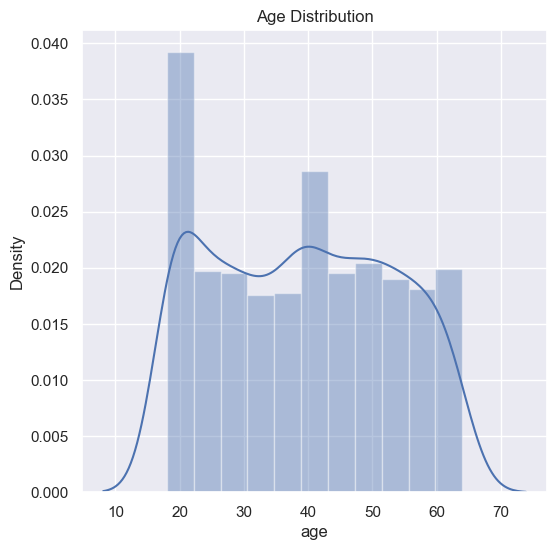

In [17]:
# distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

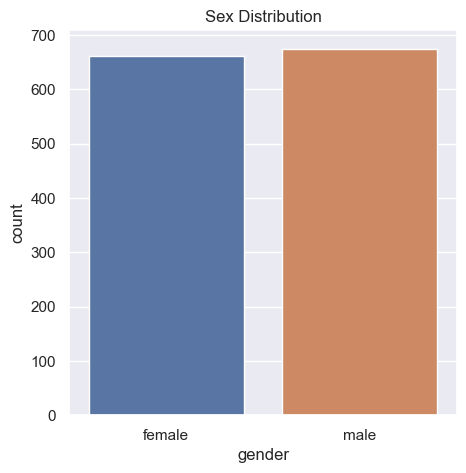

In [18]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data = df)
plt.title('Sex Distribution')
plt.show()

In [19]:
df['gender'].value_counts()

male      675
female    661
Name: gender, dtype: int64

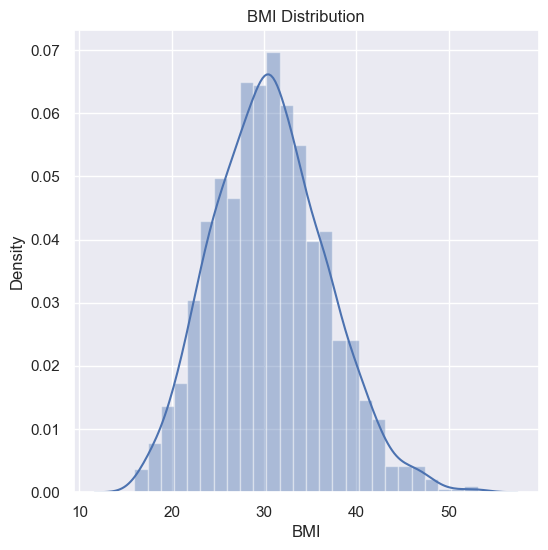

In [20]:
# BMI distribution

plt.figure(figsize=(6,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range --> 18.5 to 24.9
So here we noticed that more number of people are outside the BMI range so it can affect the insurance_price cost.

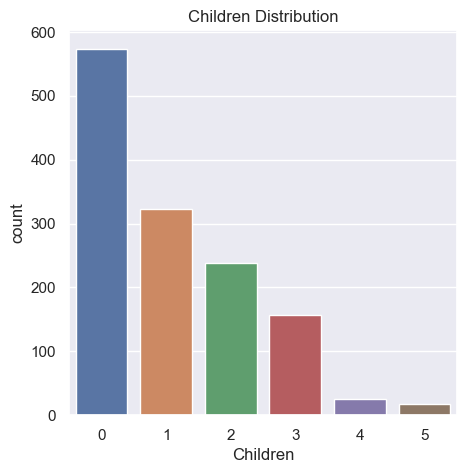

In [21]:
# Distribution of Children 

plt.figure(figsize=(5,5))
sns.countplot(x='Children', data = df)
plt.title('Children Distribution')
plt.show()

In [22]:
df['Children'].value_counts()

0    574
1    323
2    239
3    157
4     25
5     18
Name: Children, dtype: int64

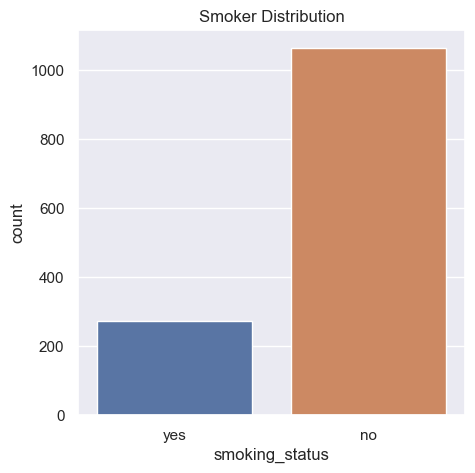

In [23]:
# Smoker Column

plt.figure(figsize=(5,5))
sns.countplot(x='smoking_status', data = df)
plt.title('Smoker Distribution')
plt.show()

In [24]:
df['smoking_status'].value_counts()

no     1063
yes     273
Name: smoking_status, dtype: int64

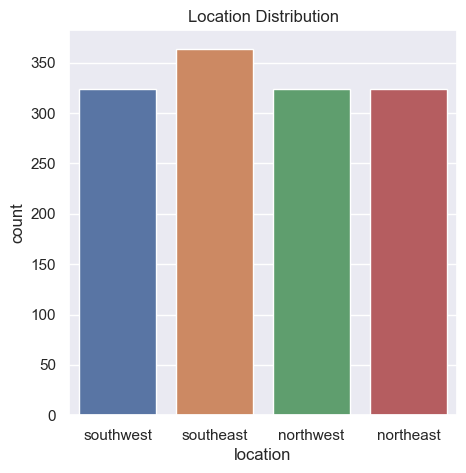

In [25]:
# Location column
plt.figure(figsize=(5,5))
sns.countplot(x='location', data = df)
plt.title('Location Distribution')
plt.show()

In [26]:
df['location'].value_counts()

southeast    364
southwest    324
northwest    324
northeast    324
Name: location, dtype: int64

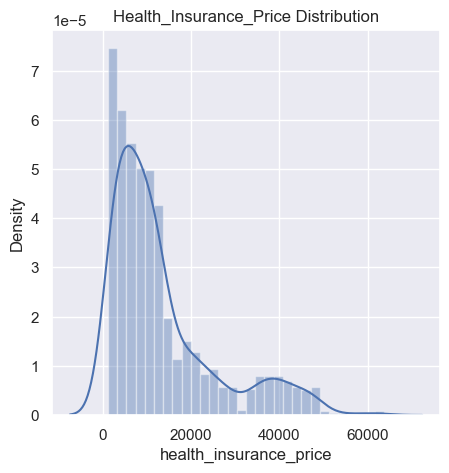

In [27]:
# Health_Insurance_Price column

plt.figure(figsize=(5,5))
sns.distplot(df['health_insurance_price'])
plt.title('Health_Insurance_Price Distribution')
plt.show()


# Bivariate and MultiVariate Analysis

<AxesSubplot:xlabel='location', ylabel='health_insurance_price'>

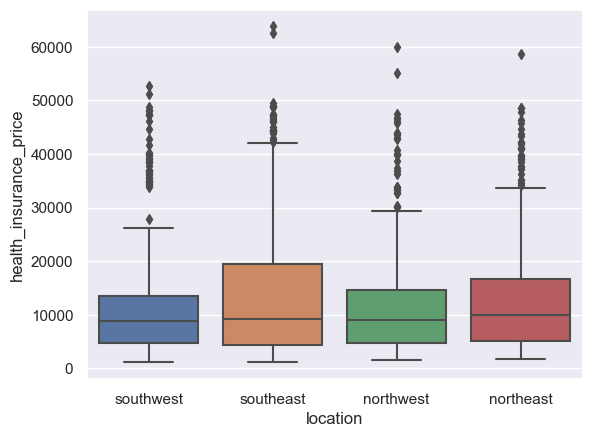

In [28]:
#Analysis between Location and Price
sns.boxplot(data=df,x='location',y='health_insurance_price')

- From this above figure we can say location does not have more impact on Medical charges.

<AxesSubplot:xlabel='smoking_status', ylabel='health_insurance_price'>

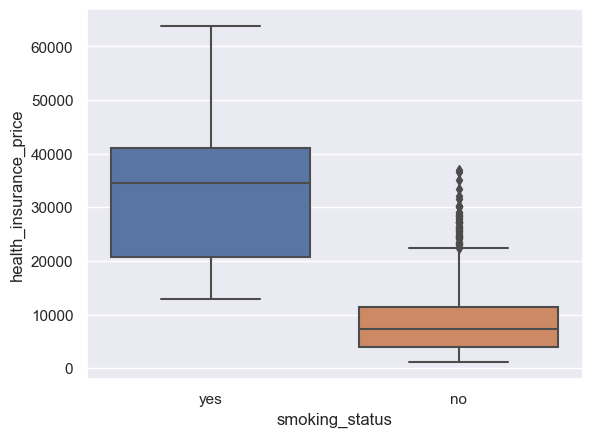

In [29]:
# Boxplot of medical charges by smoking status
sns.boxplot(data=df,x='smoking_status',y='health_insurance_price')

- From above this figure we can say Smoker spends lot more cost on medical charges.

<AxesSubplot:xlabel='gender', ylabel='health_insurance_price'>

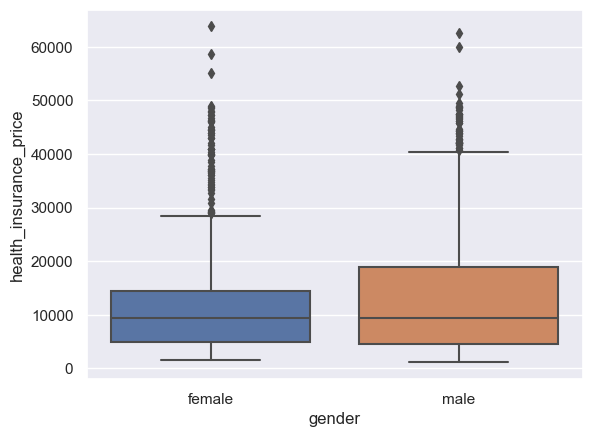

In [30]:
# Boxplot of medical charges per gender

sns.boxplot(data=df,x='gender',y='health_insurance_price')

- From above this figure we can say Charges are not much affected by gender.

<AxesSubplot:xlabel='Children', ylabel='health_insurance_price'>

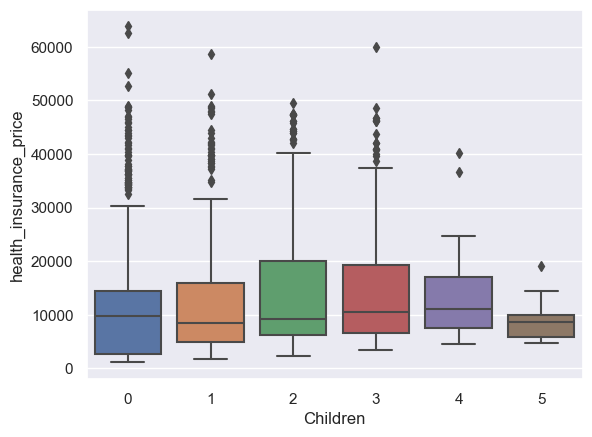

In [31]:
# Boxplot of medical charges per children

sns.boxplot(data=df,x='Children',y='health_insurance_price')

- People  with  two  children  have  more  medical expenses. In contrast, People with  Five children have fewer expenses.

<AxesSubplot:xlabel='age', ylabel='health_insurance_price'>

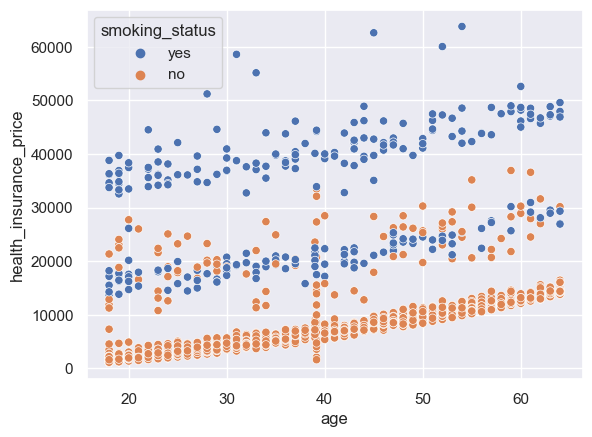

In [32]:
# Relationship between "age" and "charges" using a scatter plot.

sns.scatterplot(data=df,x='age',y='health_insurance_price',hue='smoking_status')

- The general trend seems to be that medical charges increase with age, Smoker also spends highest medical charges.

# Data Pre_processing

In [33]:
# Encoding the categorical Feature

In [34]:
# Encoding Gender column
df.replace({'gender':{'male':0,'female':1}},inplace = True)

# Encoding Smoker column
df.replace({'smoking_status':{'yes':0,'no':1}},inplace = True)

# Encoding location column
df.replace({'location':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [35]:
# Checking the data After encoding.
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,30.631158,0,0,1,16884.92400
1,18.0,0,33.770000,1,1,0,1725.55230
2,28.0,0,33.000000,3,1,0,4449.46200
3,33.0,0,22.705000,0,1,3,21984.47061
4,32.0,0,28.880000,0,1,3,3866.85520


<AxesSubplot:>

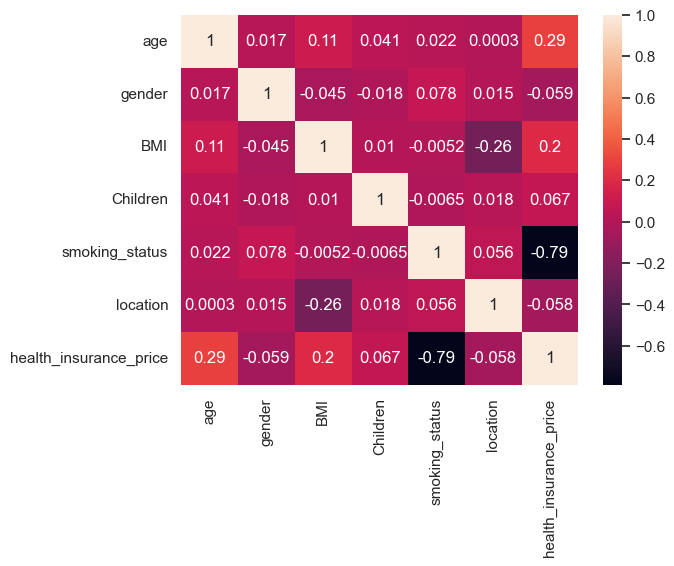

In [36]:
#Correlation between Variables
sns.heatmap(df.corr(),annot=True)

- IN above fig. Shows that variables most influence charges are Smoker,Age and BMI

# Splitting the Features and Target

In [37]:
X = df.drop(columns ='health_insurance_price', axis=1)
Y = df['health_insurance_price']

In [38]:
print(X)

       age  gender        BMI  Children  smoking_status  location
0     19.0       1  30.631158         0               0         1
1     18.0       0  33.770000         1               1         0
2     28.0       0  33.000000         3               1         0
3     33.0       0  22.705000         0               1         3
4     32.0       0  28.880000         0               1         3
...    ...     ...        ...       ...             ...       ...
1333  50.0       0  30.970000         3               1         3
1334  18.0       1  31.920000         0               1         2
1335  18.0       1  36.850000         0               1         0
1336  21.0       1  25.800000         0               1         1
1337  61.0       1  29.070000         0               0         3

[1336 rows x 6 columns]


In [39]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64


# Splitting the Training data and Testing Data

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [41]:
print(X.shape,X_train.shape,X_test.shape)

(1336, 6) (1068, 6) (268, 6)


# Model Training

In [42]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
#loading the linear Regression Model
lr = LinearRegression()
lr.fit(X_train,Y_train)
#loading SVR
svm = SVR()
svm.fit(X_train,Y_train)
#loading randomforest regressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
#loading GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

# Prediction on dataset

In [44]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual': Y_test,'Lr': y_pred1,'SVM':y_pred2,'Rf':y_pred3,'Gr':y_pred3})

In [45]:
df1

,Actual,Lr,SVM,Rf,Gr
17,2395.17155,1461.409455,9225.596638,5954.094782,5954.094782
1089,10577.08700,8716.417528,9406.751240,11738.224020,11738.224020
273,9617.66245,9774.766866,9378.412370,15687.067356,15687.067356
270,1719.43630,2189.284136,9212.669268,3515.979389,3515.979389
873,6849.02600,8736.745044,9334.917528,7263.315449,7263.315449
...,...,...,...,...,...
232,1727.78500,-1289.140283,9219.834810,1744.393603,1744.393603
323,11566.30055,15431.252423,9419.504030,12207.817709,12207.817709
1190,5327.40025,8095.404046,9262.572559,7166.423402,7166.423402
1064,5708.86700,5867.127367,9249.944532,6891.184477,6891.184477


# Compare performance visually

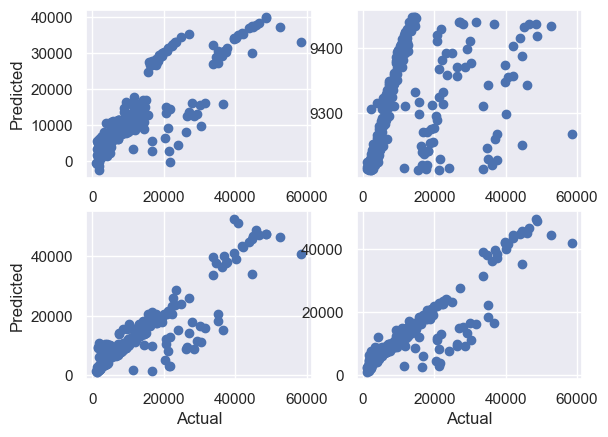

In [46]:
#Comparing with Actual value and Predicted value in Scatter plot.
plt.subplot(221)
plt.scatter(Y_test, y_pred1)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(222)
plt.scatter(Y_test, y_pred2)
plt.xlabel("Actual")
#plt.ylabel("Predicted")

plt.subplot(223)
plt.scatter(Y_test, y_pred3)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(224)
plt.scatter(Y_test, y_pred4)
plt.xlabel("Actual")
#plt.ylabel("Predicted")

plt.show()

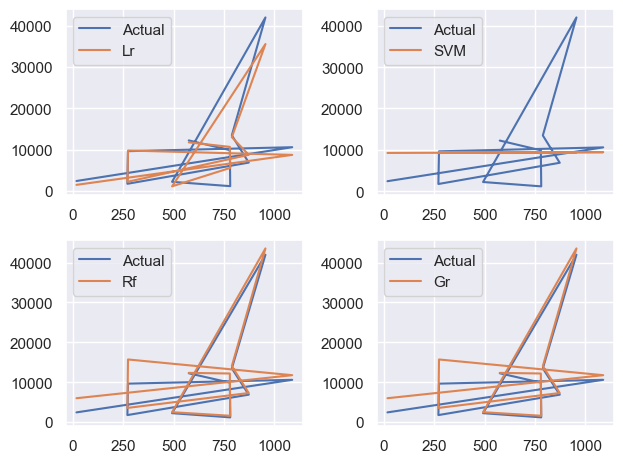

In [47]:
#Comparing with Actual value and Predicted value in line plot with 10% of data.
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Rf'].iloc[0:11],label='Rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Gr'].iloc[0:11],label='Gr')
plt.legend()

plt.tight_layout()
plt.legend()

# Evaluating algorithm

In [48]:
from sklearn import metrics

In [49]:
# Finding R-Squared value

score1 = metrics.r2_score(Y_test,y_pred1)
score2 = metrics.r2_score(Y_test,y_pred2)
score3 = metrics.r2_score(Y_test,y_pred3)
score4 = metrics.r2_score(Y_test,y_pred4)

In [50]:
print(score1,score2,score3,score4)

0.7105672910157638 -0.08342087169463275 0.7947110581358032 0.8231437544216111


In [51]:
# Finding Mean_Absolute_Error(MAE)

s1 = metrics.mean_absolute_error(Y_test,y_pred1)
s2 = metrics.mean_absolute_error(Y_test,y_pred2)
s3 = metrics.mean_absolute_error(Y_test,y_pred3)
s4 = metrics.mean_absolute_error(Y_test,y_pred4)


In [52]:
print(s1,s2,s3,s4)

4303.290708076011 8048.090869487847 3041.413277090784 2717.391079256411


In [53]:
# Finding Root_Mean_Squared_Error(RMSE)

rms1 = metrics.mean_squared_error(Y_test,y_pred1,squared=False)
rms2 = metrics.mean_squared_error(Y_test,y_pred2,squared=False)
rms3 = metrics.mean_squared_error(Y_test,y_pred3,squared=False)
rms4 = metrics.mean_squared_error(Y_test,y_pred4,squared=False)

In [54]:
print(rms1,rms2,rms3,rms4)

6279.707427037626 12149.662234045789 5288.693317073966 4908.805293266126


# MODEL PERFORMANCE

Algorithm used                 MAE            RMSE           R-squared 

LinearRegression              4253.4199      6202.2975       0.7438

SVR                           8468.7630      12731.1505      -0.0792      

RandomForestRegressor         2733.5711      4879.6875       0.8414

GredianBoostingRegressor      2440.4228      4500.7590       0.8651





 *From above analysis we found that gredianBoostingRegressor is the best model for this dataset. Before production,It is good practice to train our model for the entire dataset.*

In [55]:
#predict charges for new customer
data = {'age' : 19,
        'gender' : 1,
        'BMI' : 30.30,
        'Children' : 1,
        'smoking_status' : 1,
        'location' : 2}

In [56]:
df3 = pd.DataFrame(data,index=[0])
df3

,age,gender,BMI,Children,smoking_status,location
0,19,1,30.3,1,1,2


In [57]:
# on test dataset predict charges for new customer.
new_pred = gr.predict(df3)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  4500.2969943981025


In [58]:
#Train our model for entire dataset
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [59]:
#predict charges for new customer
new_pred = gr.predict(df3)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  5128.569560673031


# Conclusion

*Q1.Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field? 

Ans: Predicting health insurance costs accurately is crucial for both the healthcare and insurance industries. With accurate predictions, healthcare providers and insurers can plan and allocate resources effectively, making healthcare services more affordable and accessible to patients.

Furthermore, predicting health insurance costs accurately can help insurance companies price their policies more competitively. This can lead to a more efficient market where customers can compare and choose policies based on their individual needs, thus promoting transparency and better outcomes for consumers.

*Q2. If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?

Ans: Accurate predictions can also help insurers develop customized policies and offer personalized services to their customers, which can lead to higher customer satisfaction rates and retention rates.

Overall, accurate predictions of health insurance costs are essential for both the healthcare and insurance industries to provide affordable and accessible healthcare services to patients while promoting competition and innovation in the insurance market.

*Q3. Please aim to identify patterns in the data and important features that may impact an ML model.

Ans: Identifying patterns and important features in health insurance prediction data is crucial for developing an accurate machine learning model. Here are some potential patterns and features that may impact an ML model in the context of health insurance prediction:

Age: Age is an important factor that may impact health insurance costs. As people age, they may require more medical attention, leading to higher costs.

Gender: Gender is another important feature to consider. In general, women tend to require more medical attention than men, especially during reproductive years.

Health Status: The overall health status of an individual can also impact health insurance costs. People with pre-existing conditions may require more medical attention and therefore may have higher insurance costs.

Geographic Location: Geographic location can impact health insurance costs as healthcare costs vary by region. For example, healthcare costs may be higher in urban areas compared to rural areas.

Type of Coverage: The type of coverage selected by an individual can also impact insurance costs. For example, a policy with a lower deductible may have a higher premium, whereas a policy with a higher deductible may have a lower premium.

Lifestyle Factors: Lifestyle factors, such as smoking, alcohol consumption, and physical activity level, can impact health insurance costs. Smokers, for example, are at a higher risk for many health conditions and may therefore have higher insurance costs.

Family Size: Family size can impact health insurance costs as policies covering more individuals may have higher premiums.

By identifying these patterns and important features, an ML model can be trained to accurately predict health insurance costs based on the specific characteristics of an individual. This can lead to more efficient pricing of insurance policies and better allocation of healthcare resources.

*Q4. Please perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.

Ans: I have performed 4 machine learning models i.e LinearRegressor, SVR, RandomForestRegressor and GredianBoostingRegressor.
From above analysis it shows  that Gradient Boosting offers the best efficiency,Gradient boosting can therefore be used in the estimation of insurance costs with better performance than other regression models.